# Propagation
### Another way to create networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# A reminder about dictionaries:
a = {}
a = dict()
a['ladybug'] = 12
a[1] = [1,2,3]
a[(1,2)] = 'I like cookies'
a

{'ladybug': 12, 1: [1, 2, 3], (1, 2): 'I like cookies'}

A graph of 7 nodes:
0:[1, 2]
1:[0]
2:[0]
3:[4]
4:[3, 5]
5:[4]
7:[]

Nodes: [0, 1, 2, 3, 4, 5, 7]
Edges: [(0, 1), (0, 2), (3, 4), (4, 5)]


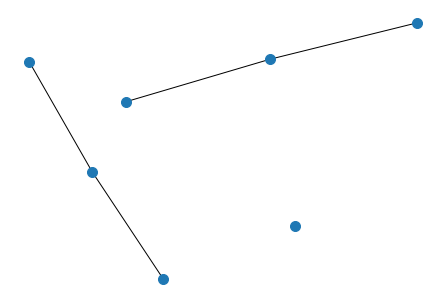

In [4]:
class Graph():
    def __init__(self):
        self.gdict = {}
        
    def add_node(self, node):
        """If node is not in a dictionary, add it."""
        if node not in self.gdict:
            self.gdict[node] = []
    
    def add_edge(self, node1, node2):        
        self.add_node(node1)
        self.add_node(node2)
        # Add node2 as a connection for node1, and the other way around
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
            
    def nodes(self):
        """Returns a list of nodes."""
        return list(self.gdict.keys())
    
    def edges(self):
        """Returns a list of edges."""
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node<link:
                    out.append((node,link))
        return out
            
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    
    def plot(self):
        g_nx = nx.Graph()
        g_nx.add_nodes_from(self.nodes())
        g_nx.add_edges_from(self.edges())
        nx.draw_kamada_kawai(g_nx, node_size=100)
    
# Test
g = Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_node(7)
print(g)
print('Nodes:',g.nodes())
print('Edges:',g.edges())
g.plot();

In [30]:
def degrees(g):
    """Calculates degrees distribution and plots a histogram"""
    degrees = []
    for node,links in g.gdict.items():
        degrees.append(len(links))

    #print(degrees)
    hist = np.zeros(max(degrees)+1)
    for degree in degrees:
        hist[degree] += 1
    #print(hist)

    plt.plot(hist,'.-');
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    
    return hist


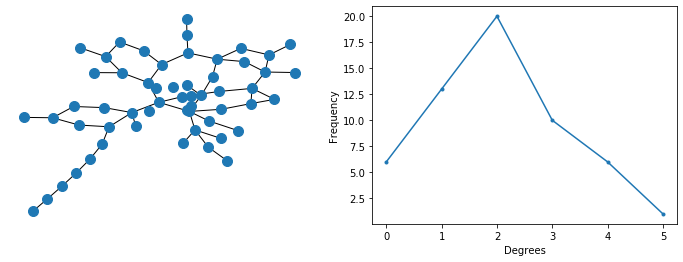

In [36]:
# Create a random network.

def random_network(n_nodes=7):
    n_edges = n_nodes

    g = Graph()
    for i in range(n_nodes):
        g.add_node(i)
    edges = []
    while len(edges)<n_edges:
        n1 = np.random.randint(low=0, high=n_nodes)
        n2 = np.random.randint(low=0, high=n_nodes)
        if n2<n1:
            n1,n2 = n2,n1

        if (n1,n2) not in edges and n1!=n2:
            g.add_edge(n1,n2)
            edges.append((n1,n2))
    return g
    
#print(g)

g = random_network(56)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot();
plt.subplot(122)
degrees_random = degrees(g)

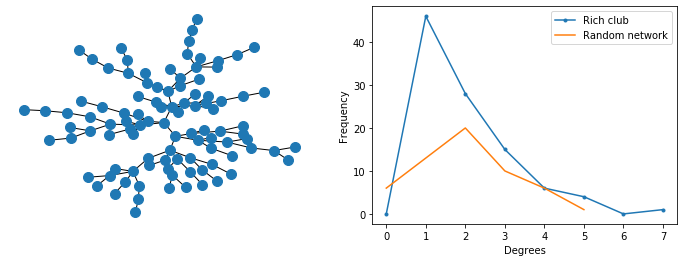

In [42]:
# An alternate way to create a network.

def rich_club_network(n_nodes=7):
        g = Graph()
        for i in range(n_nodes):
            if i==0:
                g.add_node(0)
            else:
                g.add_edge(i, np.random.randint(low=0, high=i))
        return g

#print(g)

g = rich_club_network(100)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot();
plt.subplot(122)
degrees(g)
plt.plot(degrees_random)
plt.legend(["Rich club", "Random network"])